# prepare a prediction model for predicting Price

In [1]:
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns 
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [2]:
# passing encoding to solve UnicodeDecodeError
toyota = pd.read_csv('ToyotaCorolla.csv',encoding='iso-8859-1')
toyota = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
# dataset have 1436 obervations 
# and 9 columns 
toyota.shape

(1436, 9)

In [4]:
# there are no categorical columns present 
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
# there are NO null values present in dataset  
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
# statstically inspecting skewness 
# Price and KM data are highly right skewed
toyota[['Price','KM']].skew()

Price    1.703885
KM       1.015912
dtype: float64

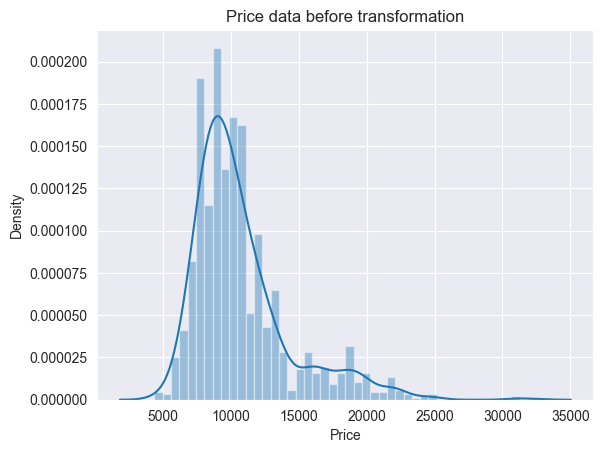

In [8]:
# visually inspecting skewness of data
# Price data is right skewed
sns.distplot(toyota.Price)
plt.title('Price data before transformation')
plt.show()

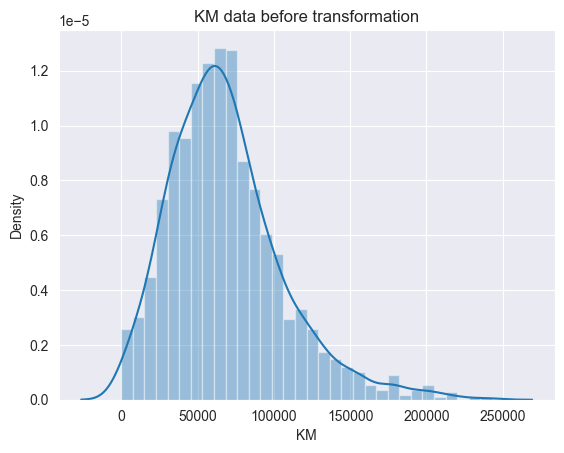

In [9]:
# KM data is higly right skewed
sns.distplot(toyota.KM)
plt.title('KM data before transformation')
plt.show()

In [10]:
# performing log transformation on Price data 
# to reduce its positive skewness
newPrice = np.log(toyota.Price)

In [11]:
# performing square root transformation on Price data 
# to reduce its positive skewness
newKM = toyota.KM**0.5

In [12]:
# reduced skewness after transformation 
newPrice.skew()

0.7341872227655821

In [13]:
# reduced skewness after transformation
newKM.skew()

-0.11289840107879275

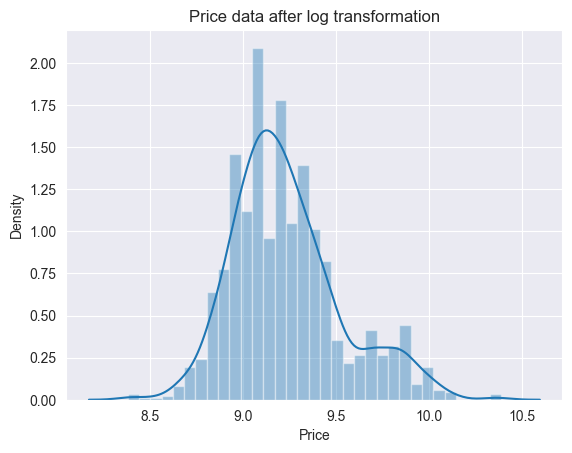

In [14]:
# Price data is fairly normal distributed 
sns.distplot(np.log(toyota.Price))
plt.title('Price data after log transformation')
plt.show()

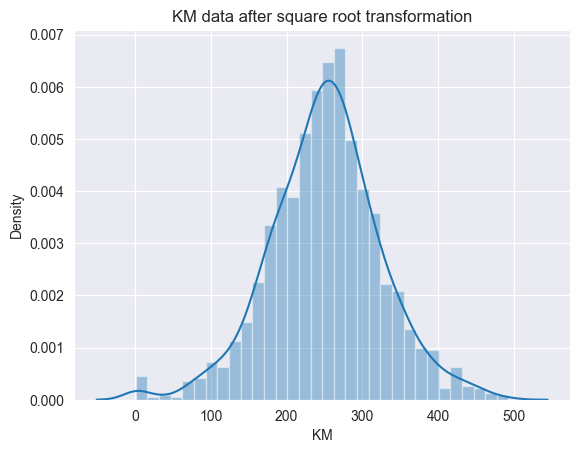

In [15]:
# KM data is fairly normal distributed 
sns.distplot(toyota.KM**0.5)
plt.title('KM data after square root transformation')
plt.show()

In [16]:
newData = toyota.copy(deep=True)
newData['KM'] = toyota.KM**0.5
newData['Price'] = np.log(toyota.Price)
# renaming few columns 
newData.rename(columns={'Age_08_04':'Age',
                        'Quarterly_Tax':'Tax'},inplace=True)

In [17]:
# new data frame with transformed data 
newData.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,9.510445,23,216.762543,90,2000,3,5,210,1165
1,9.528794,23,270.068510,90,2000,3,5,210,1165
2,9.543235,24,204.232710,90,2000,3,5,210,1165
3,9.612467,26,219.089023,90,2000,3,5,210,1165
4,9.528794,30,196.214169,90,2000,3,5,210,1170


In [18]:
# segregating dataset into feature and target
X = newData.iloc[:,1:]  # features
Y = newData[['Price']]  # target

In [19]:
X.head()

,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,23,216.762543,90,2000,3,5,210,1165
1,23,270.068510,90,2000,3,5,210,1165
2,24,204.232710,90,2000,3,5,210,1165
3,26,219.089023,90,2000,3,5,210,1165
4,30,196.214169,90,2000,3,5,210,1170


In [20]:
Y.head()

,Price
0,9.510445
1,9.528794
2,9.543235
3,9.612467
4,9.528794


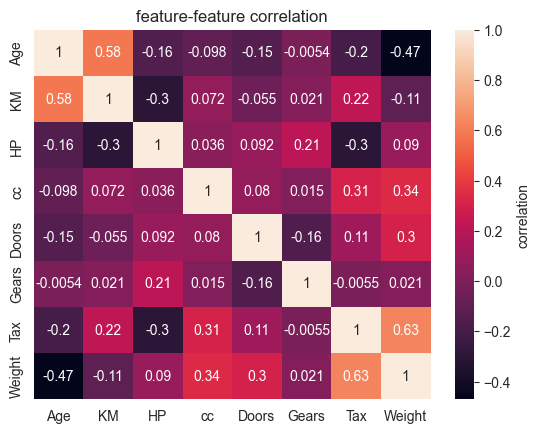

In [21]:
# inspecting feature-feature linear correlation
# conclusion -> no feature is highly correlated to another feature 
# only Tax-Weight have low positive correlation 
# check it later using VIF
sns.heatmap(X.corr(),annot=True,cbar_kws={'label': 'correlation'})
plt.title('feature-feature correlation')
plt.show()

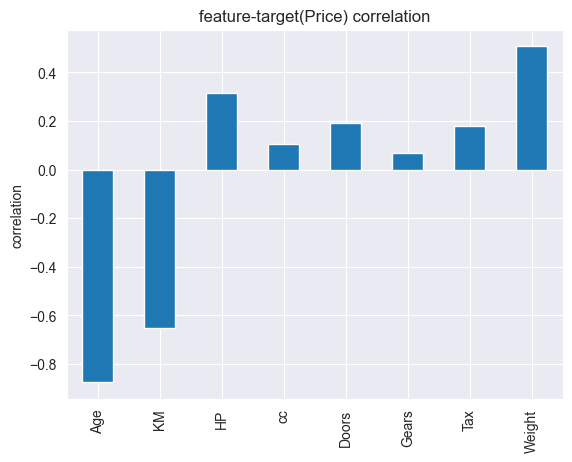

In [22]:
# feature-target(Price) correlation 
# age is highly correlated to price 
newData.corr().loc['Price'][1:].plot(kind='bar')
plt.title('feature-target(Price) correlation')
plt.ylabel('correlation')
plt.show()

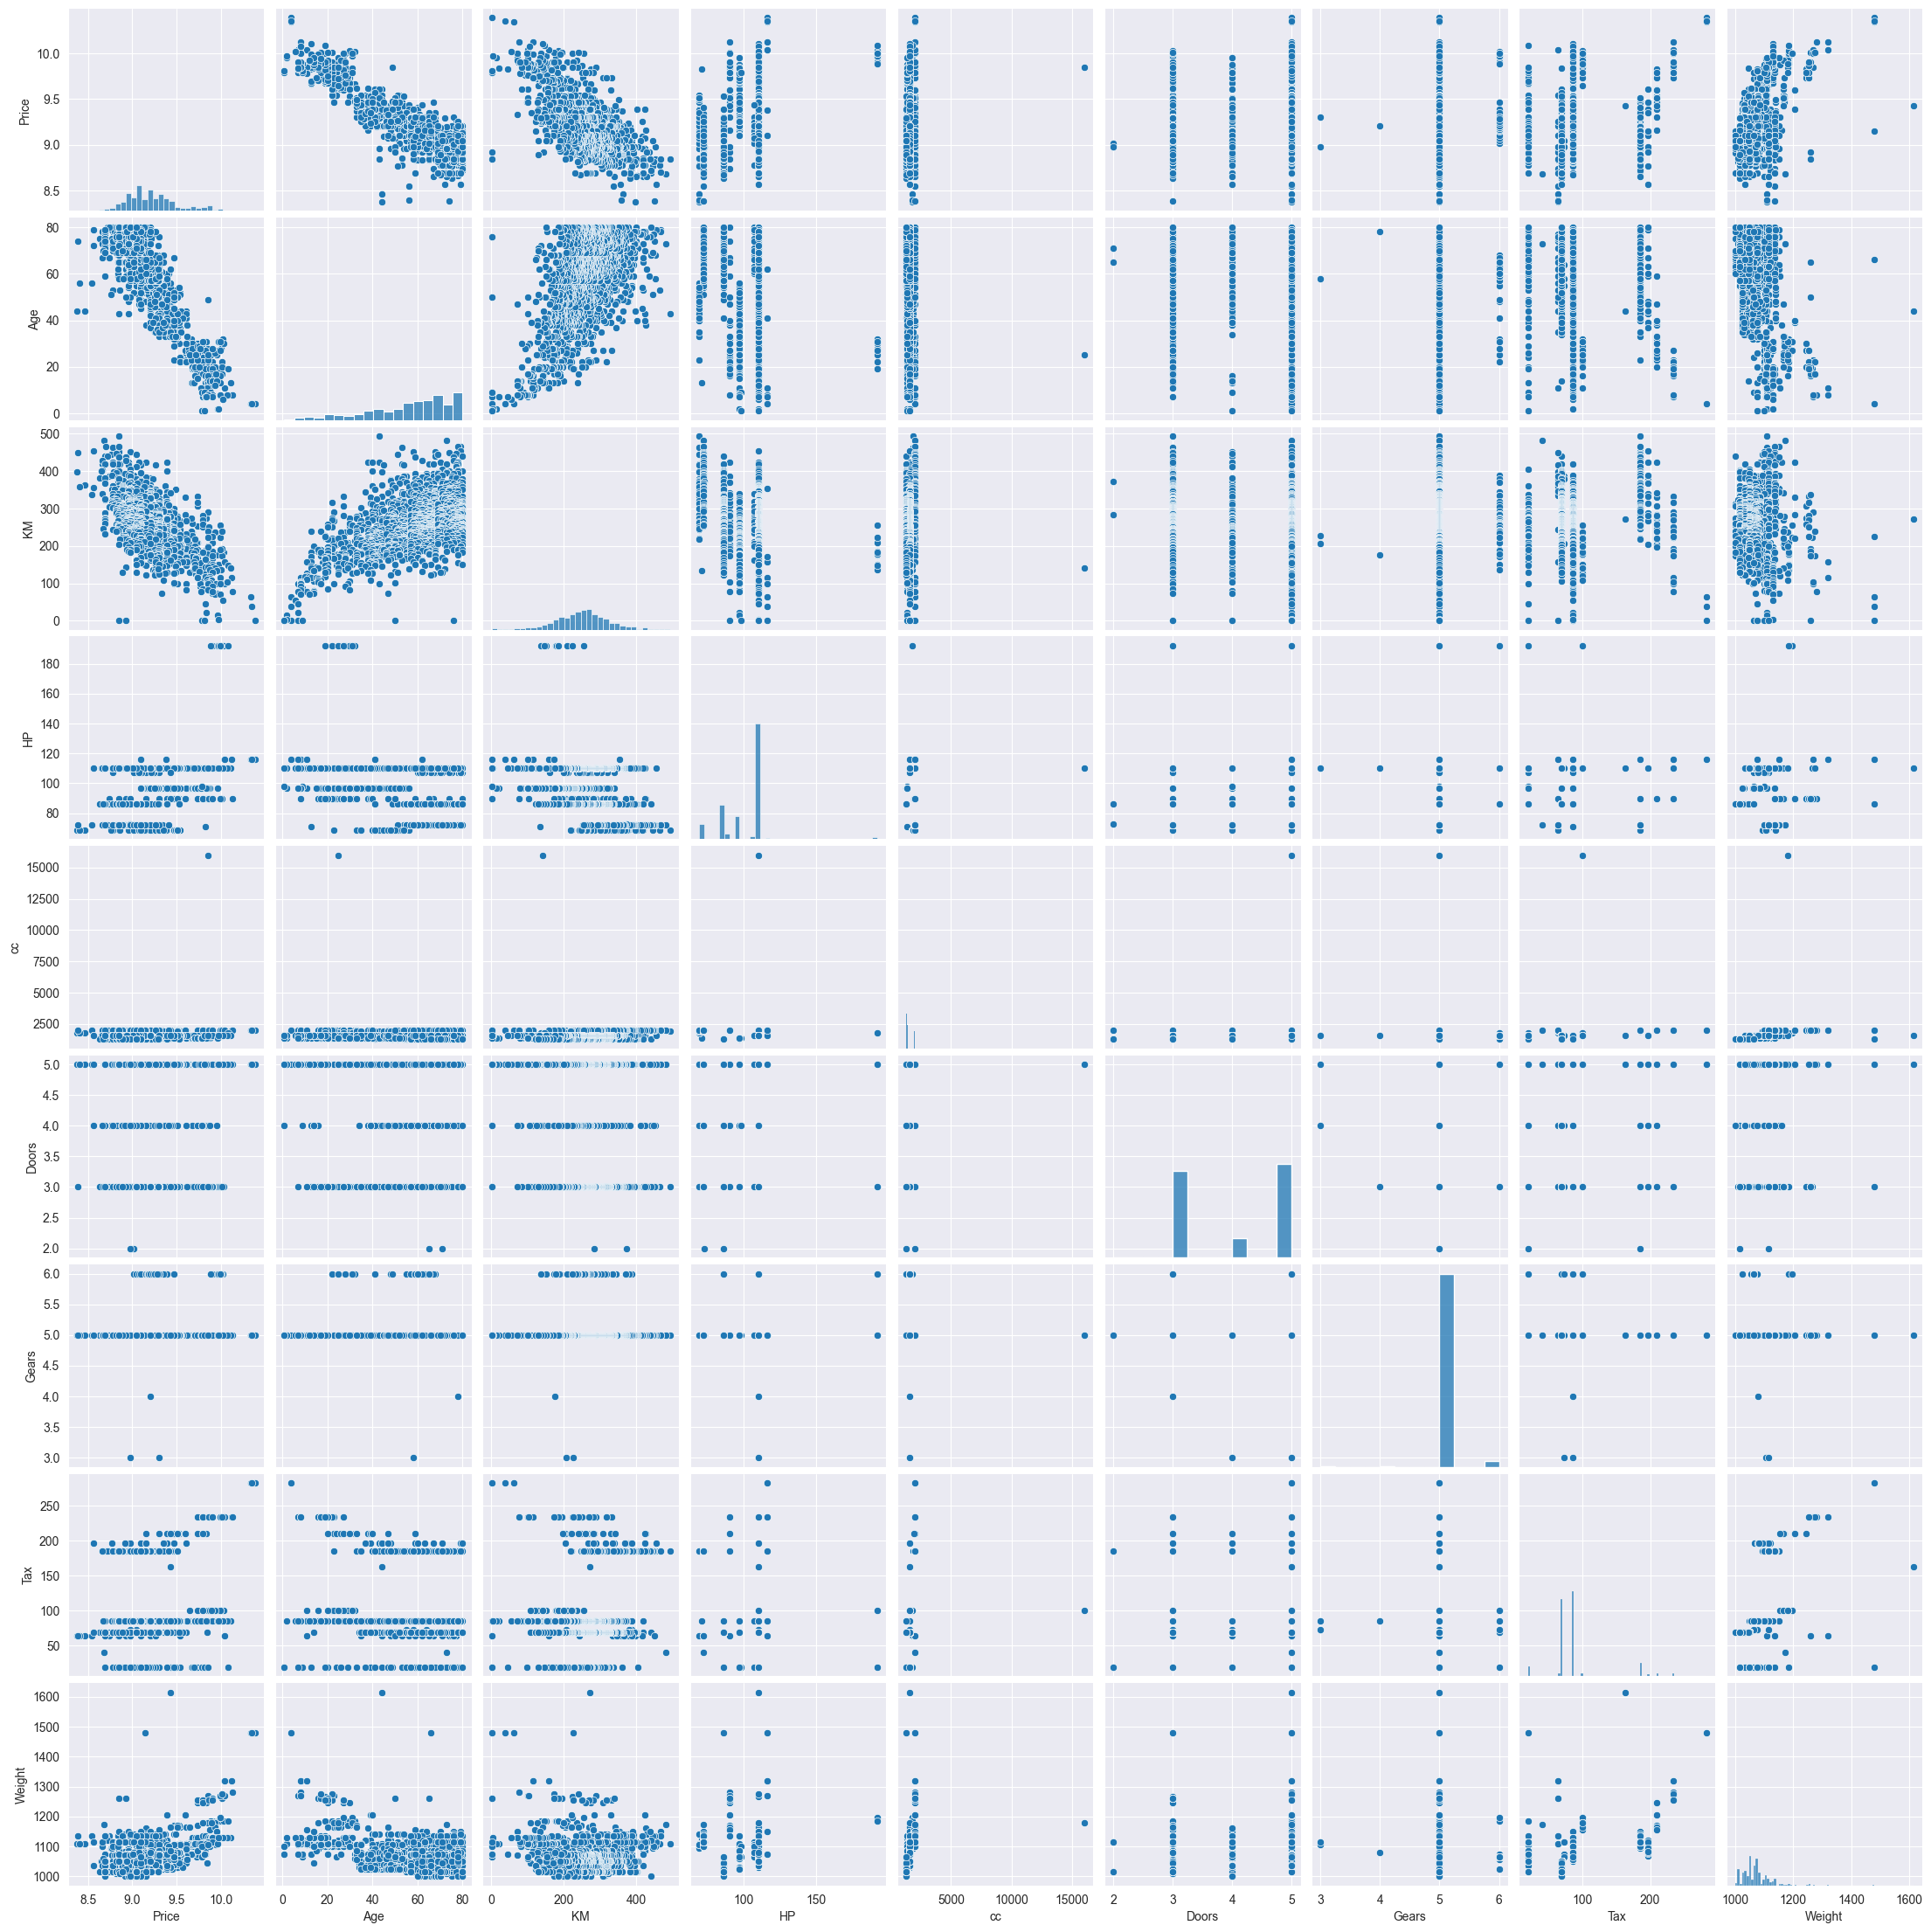

In [23]:
# plot pairplot 
# get overview of all the data 
sns.pairplot(newData)
plt.show()

In [24]:
newData.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,9.510445,23,216.762543,90,2000,3,5,210,1165
1,9.528794,23,270.068510,90,2000,3,5,210,1165
2,9.543235,24,204.232710,90,2000,3,5,210,1165
3,9.612467,26,219.089023,90,2000,3,5,210,1165
4,9.528794,30,196.214169,90,2000,3,5,210,1170


In [25]:
# linear regression model 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',
                data=newData).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     967.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:34:02   Log-Likelihood:                 1045.4
No. Observations:                1436   AIC:                            -2073.
Df Residuals:                    1427   BIC:                            -2025.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7028      0.123     70.789      0.000       8.462       8.944
Age           -0.0102      0.000    -42.901      0.000      -0.011      -0.010
KM            -0.0010   5.78e-05    -16.682      0.000      -0.001      -0.001
HP             0.0029      0.000     11.990      0.000       0.002       0.003
cc         -6.065e-06   7.86e-06     -0.772      0.441   -2.15e-05    9.36e-06
Doors          0.0107      0.003      3.073      0.002       0.004       0.018
Gears          0.0658      0.017      3.826      0.000       0.032       0.100
Tax            0.0006      0.000      5.261      0.000       0.000       0.001
Weight         0.0006   9.32e-05      6.329      0.000       0.000       0.001
==============================================================================
Omnibus:                      250.602   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1034.735
Skew:                          -0.782   Prob(JB):                    2.04e-225
Kurtosis:                       6.853   Cond. No.                     7.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

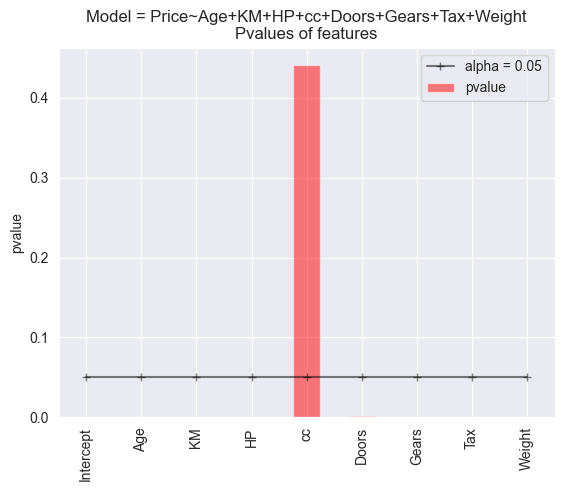

In [27]:
# since pvalue of feature 'cc' is greater than aplha
# concluding 'cc' is redundant feature 
model.pvalues.plot(kind='bar'
                   ,alpha=0.5,
                   color='red',
                   label='pvalue')
plt.plot(model.pvalues.index,
         [0.05 for i in range(len(model.pvalues))],
         color='black',
         marker='+',
         label='alpha = 0.05',
         alpha=0.5)
plt.ylabel('pvalue')
plt.title('Model = Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight\nPvalues of features')
plt.legend()
plt.show()

In [28]:
model.pvalues.sort_values()

Intercept     0.000000e+00
Age          5.441682e-259
KM            3.217457e-57
HP            1.258062e-31
Weight        3.292818e-10
Tax           1.655261e-07
Gears         1.358253e-04
Doors         2.156957e-03
cc            4.405242e-01
dtype: float64

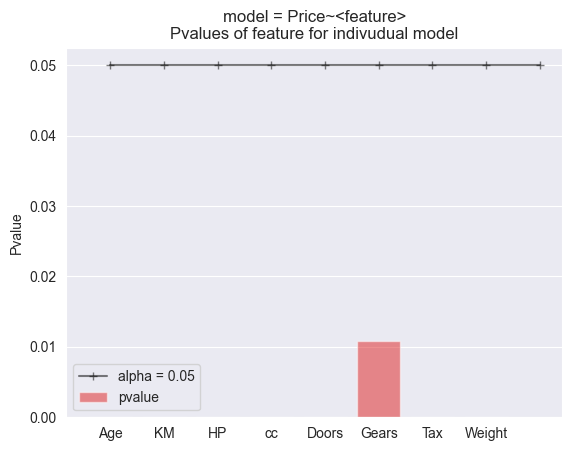

In [29]:
# model built by passing individual feature 
# Price ~ <feature>
pvalue = []
for col in X.columns:
    checkModel = smf.ols('Price~'+col,
                          data=newData).fit()
    pvalue.append(checkModel.pvalues[col])
sns.barplot(x=X.columns,
            y=pvalue,
            color='red',
            alpha=0.5,
            label='pvalue')
plt.plot(model.pvalues.index,
         [0.05 for i in range(len(model.pvalues))],
         color='black',
         marker='+',
         label='alpha = 0.05',
         alpha=0.5)
plt.ylabel('Pvalue')
plt.title('model = Price~<feature>'+'\nPvalues of feature for indivudual model')
plt.legend()
plt.show()

### 'cc' column is redundant when combined with other features but individually is not redundant.

In [30]:
# checking for multicollinearty using VIF
row = []
for col in X.columns:
    formula = col+'~'+'+'.join([i for i in X.columns if i != col])
    checkVIF = smf.ols(formula,
                       data=newData).fit().rsquared
    row.append([col,round(1/(1-checkVIF),2)])
pd.DataFrame(row,columns=['Variable','VIF'])

,Variable,VIF
0,Age,2.06
1,KM,1.90
2,HP,1.39
3,cc,1.16
4,Doors,1.16
5,Gears,1.10
6,Tax,2.34
7,Weight,2.51


### there is no Multicollinearity 

In [31]:
# since 'cc' is redundant feature 
# drop it 
newModel = smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Weight',
                   data=newData).fit()


In [32]:
newModel.pvalues

Intercept     0.000000e+00
Age          3.428438e-259
KM            9.913776e-58
HP            1.558435e-31
Doors         2.063889e-03
Gears         1.295015e-04
Tax           2.210239e-07
Weight        4.253065e-10
dtype: float64

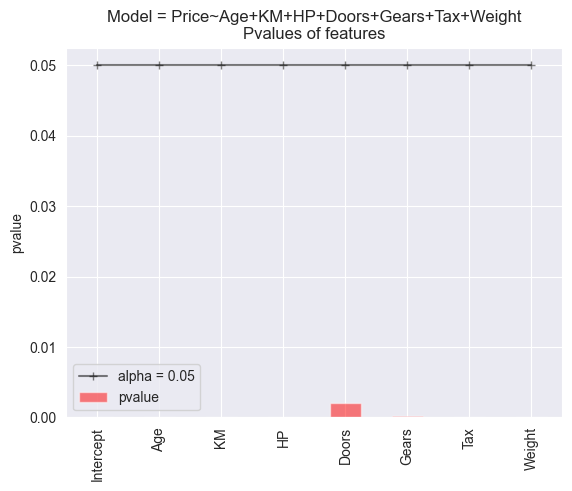

In [33]:
# after dropping Redundant feature 'cc'
newModel.pvalues.plot(kind='bar'
                   ,alpha=0.5,
                   color='red',
                   label='pvalue')
plt.plot(newModel.pvalues.index,
         [0.05 for i in range(len(newModel.pvalues))],
         color='black',
         marker='+',
         label='alpha = 0.05',
         alpha=0.5)
plt.ylabel('pvalue')
plt.title('Model = Price~Age+KM+HP+Doors+Gears+Tax+Weight\nPvalues of features')
plt.legend()
plt.show()

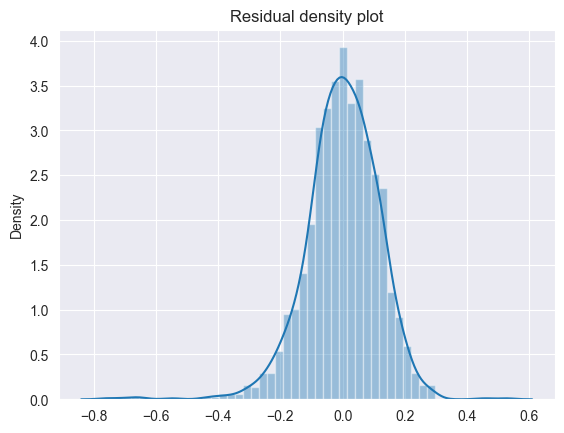

In [34]:
# residual density plot is normally distributed 
# satisfies assumption about linear regression 
sns.distplot(newModel.resid)
plt.title('Residual density plot')
plt.show()

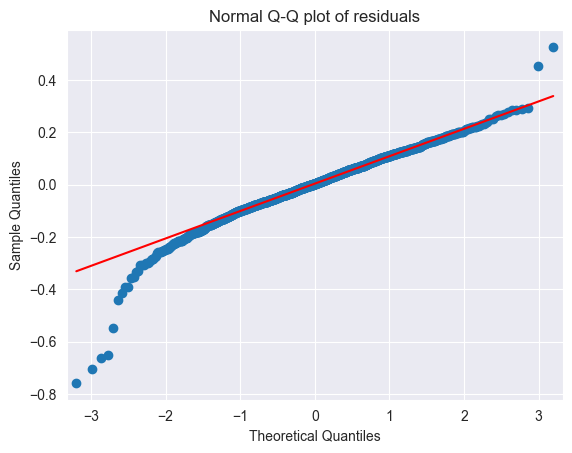

In [35]:
# data is peaked in the middle 
qqplot = sm.qqplot(newModel.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

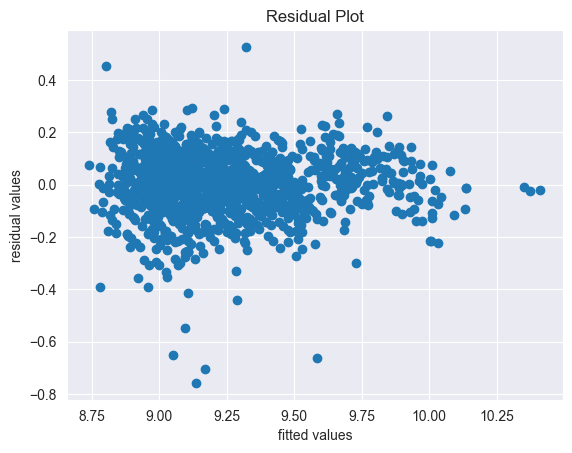

In [36]:
# plot not perfect but fairly homoscedastic
plt.scatter(newModel.fittedvalues,
            newModel.resid)
plt.title('Residual Plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


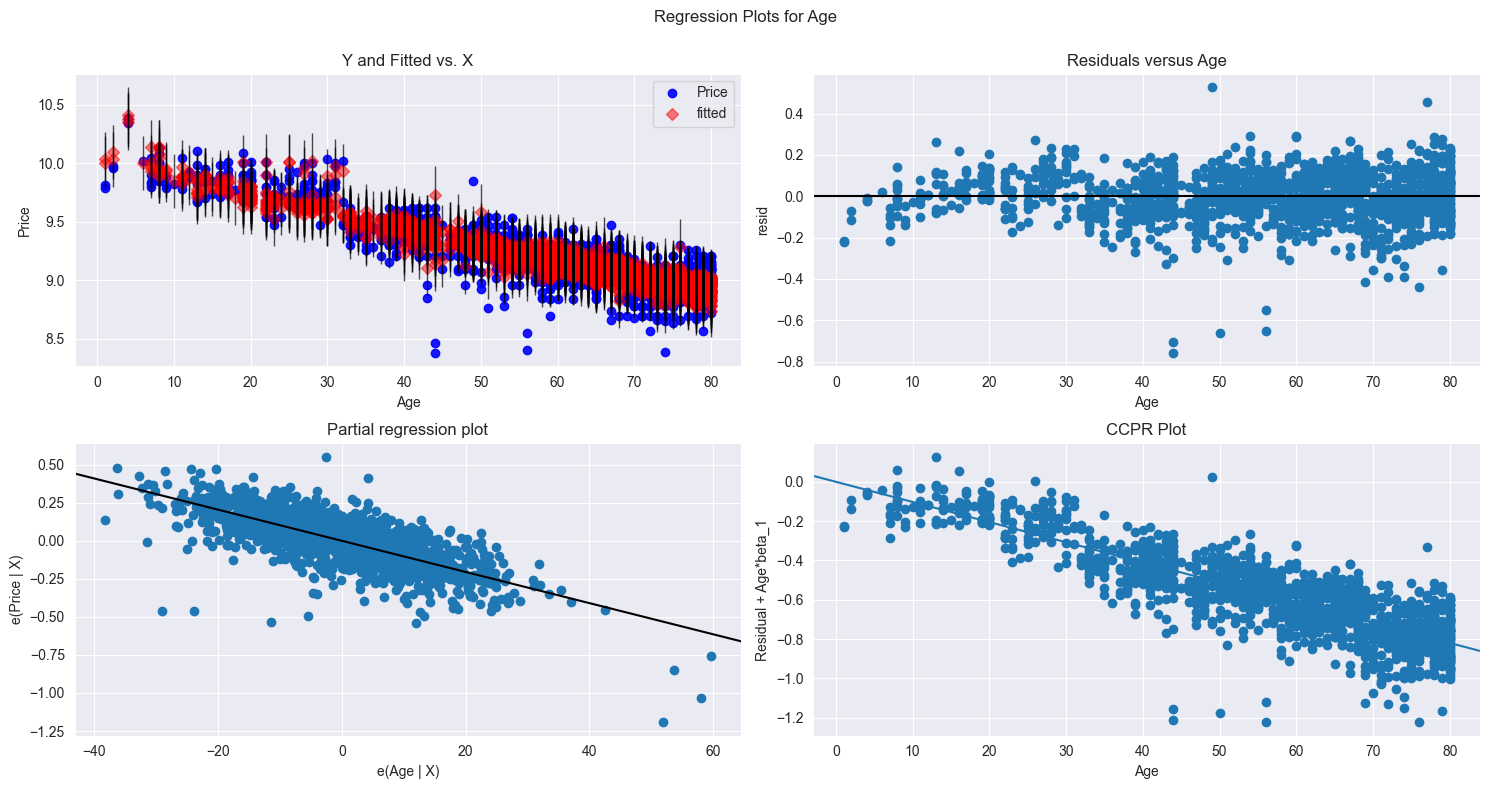

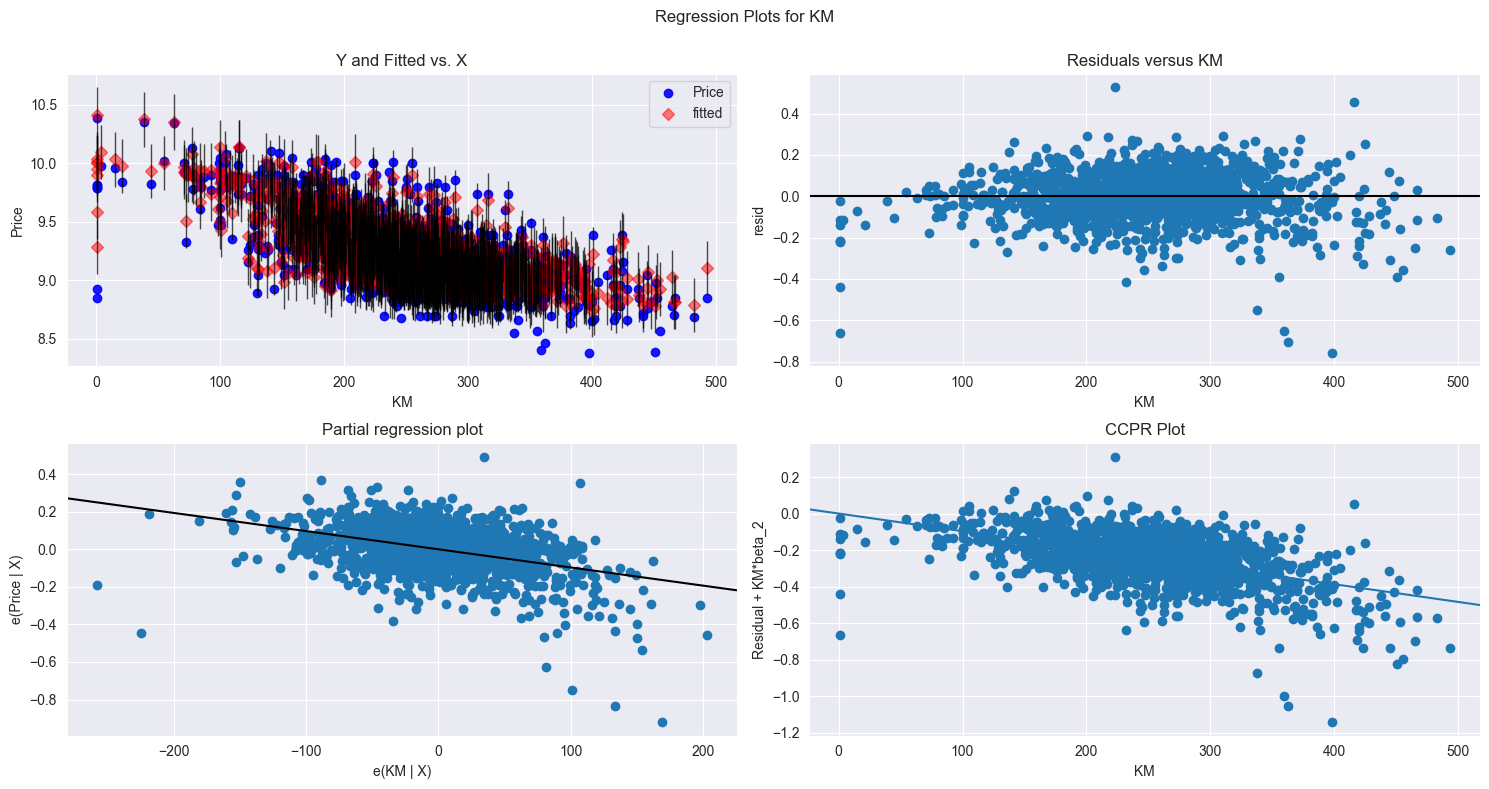

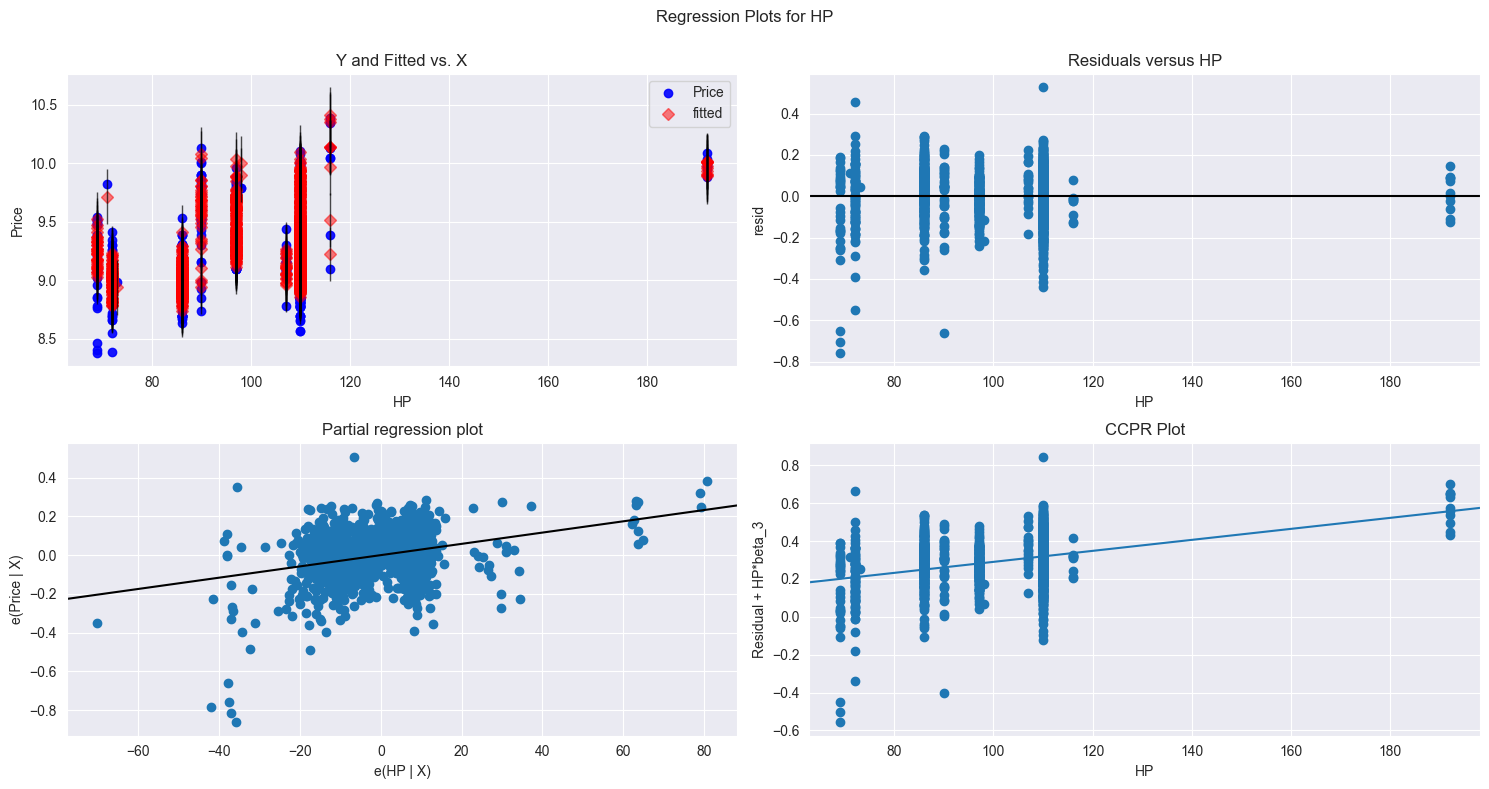

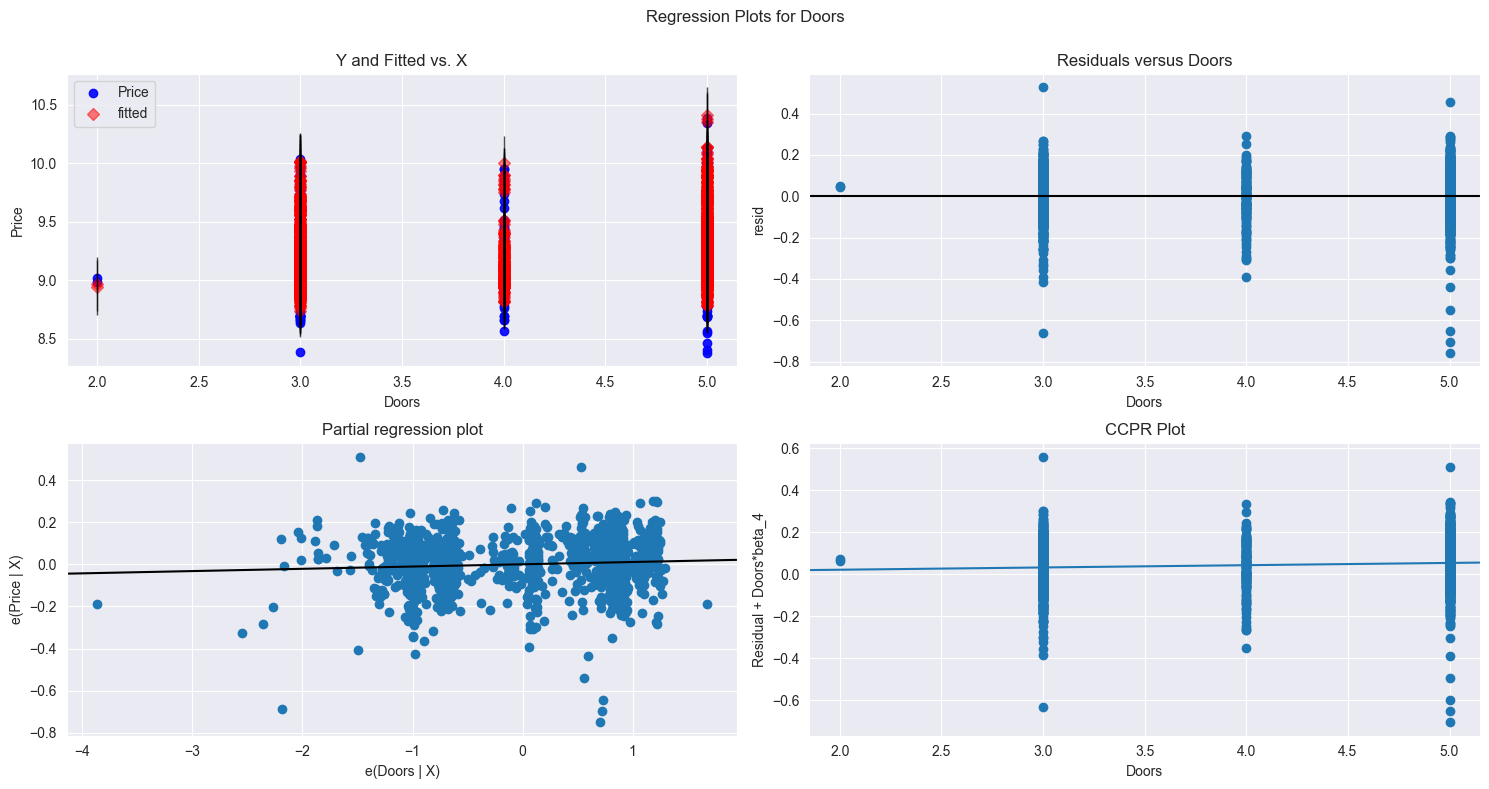

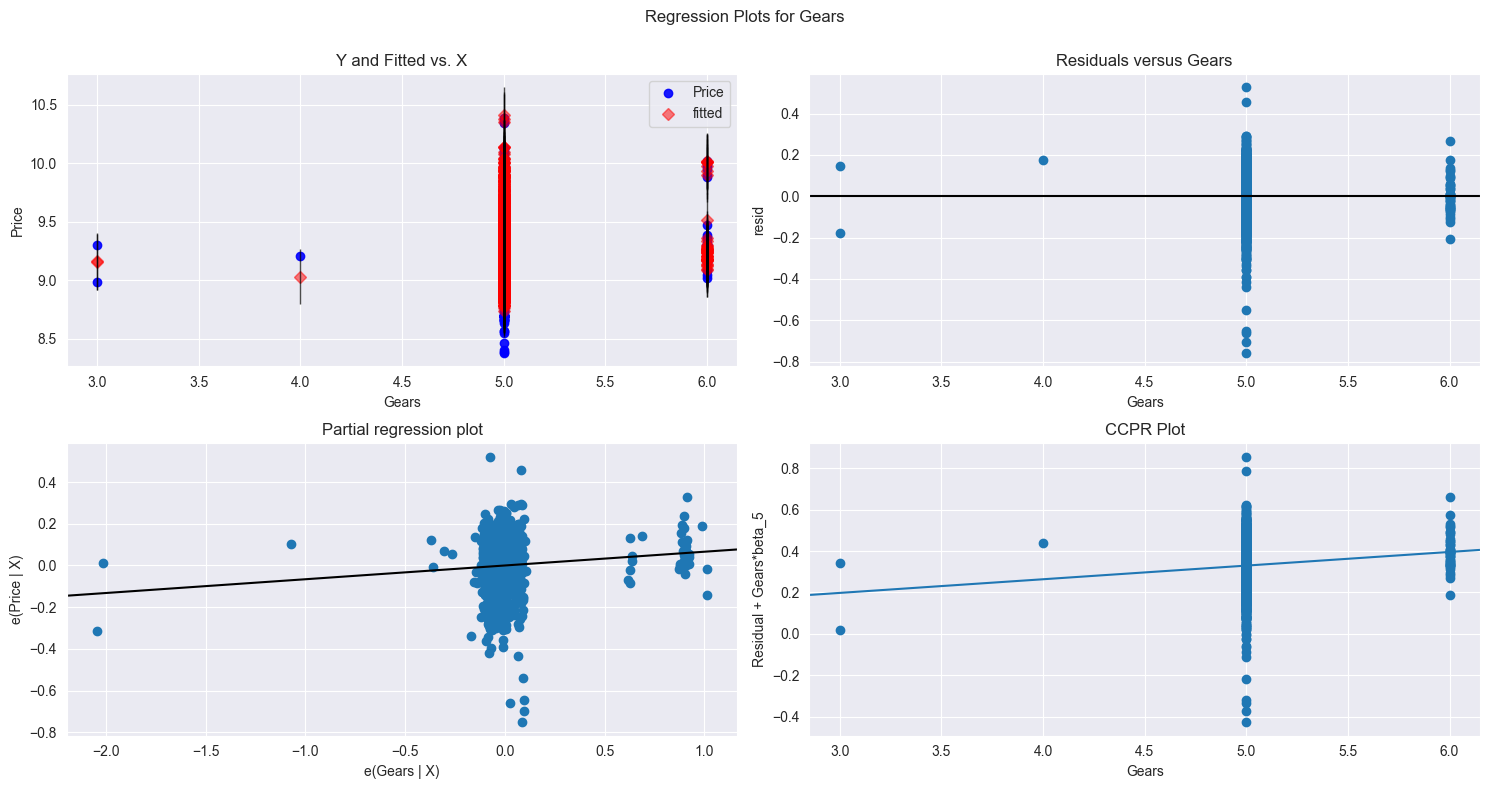

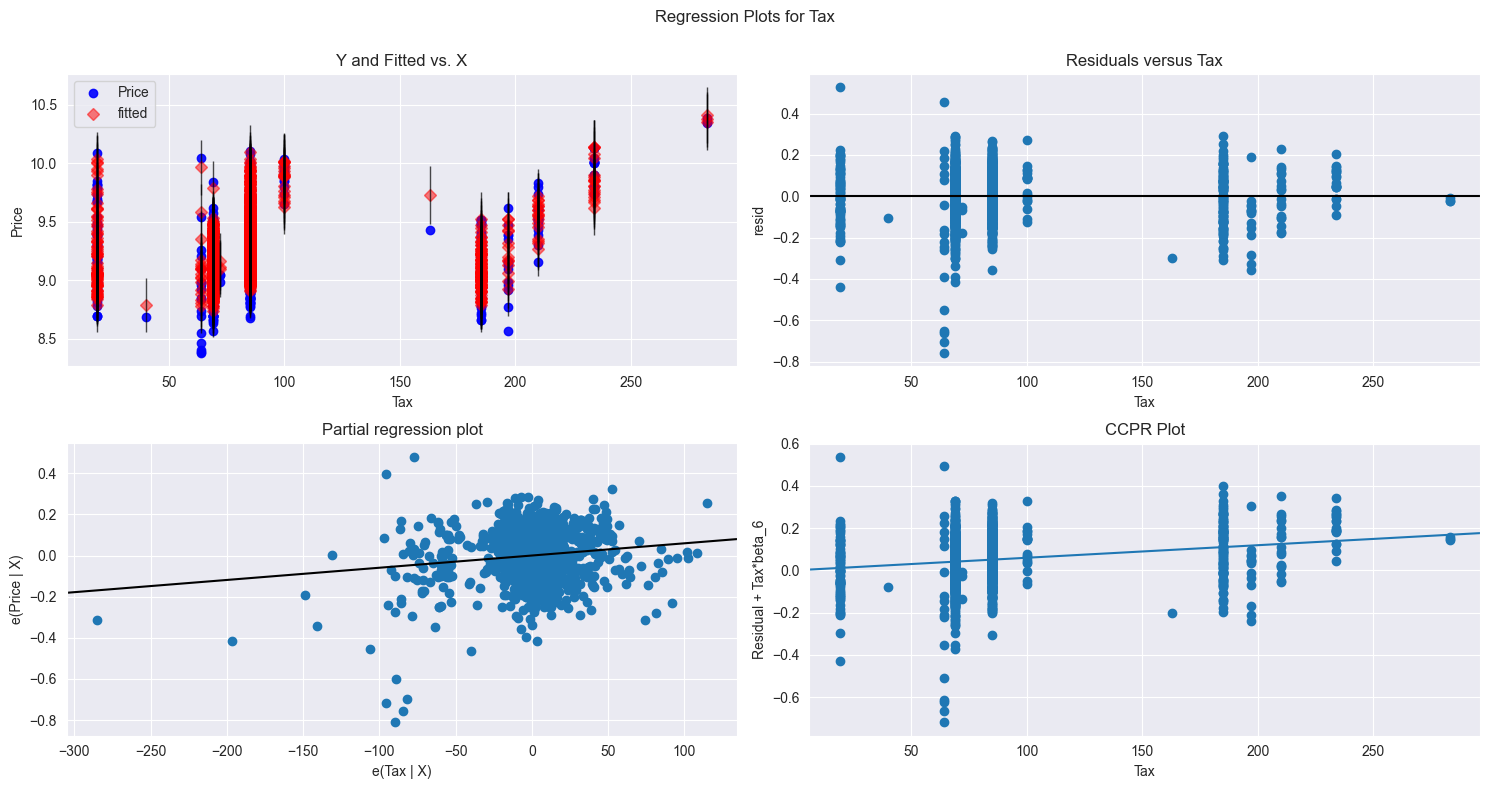

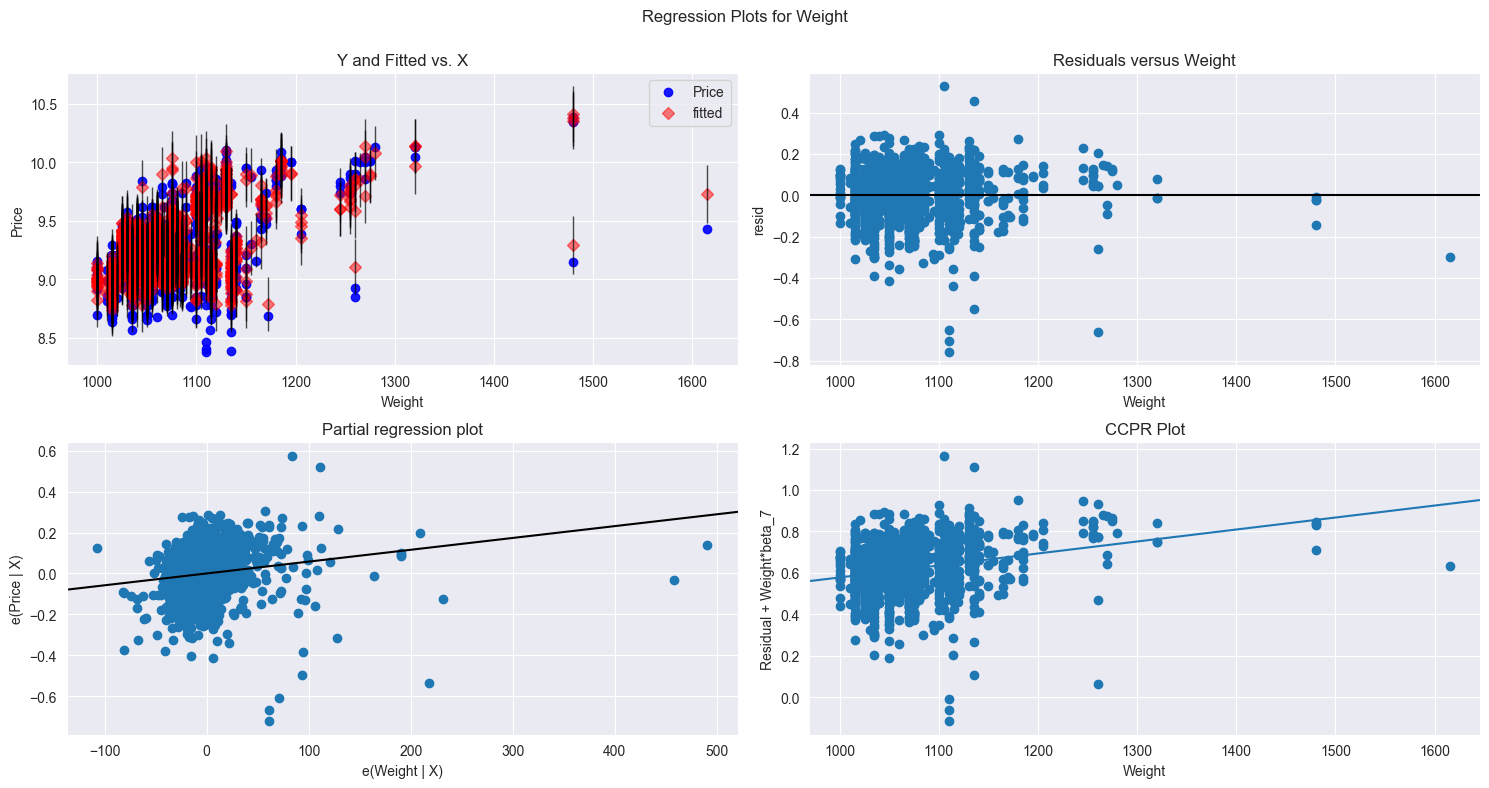

In [37]:
# multiple regression plots 
for col in [x for x in X.columns if x != 'cc']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(newModel,
                                    col,
                                    fig=fig)
plt.show()

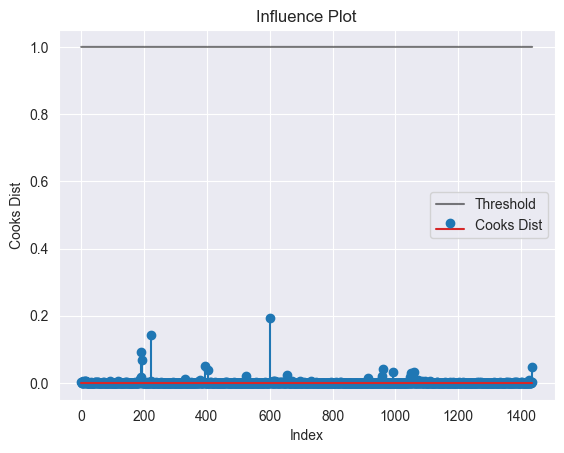

In [38]:
# no influential data points present 
model_inf = newModel.get_influence()
c, _ = model_inf.cooks_distance
plt.stem(np.arange(len(c)),
         np.round(c,3),
         label='Cooks Dist')
plt.plot(np.arange(len(c)),
         [1 for i in range(len(c))],
         color='black',
         alpha=0.5,
         label='Threshold')
plt.title('Influence Plot')
plt.ylabel('Cooks Dist')
plt.xlabel('Index')
plt.legend()
plt.show()

### no influential data points present 

In [39]:
# final model 
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:34:12   Log-Likelihood:                 1045.1
No. Observations:                1436   AIC:                            -2074.
Df Residuals:                    1428   BIC:                            -2032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7081      0.123     70.955      0.000       8.467       8.949
Age           -0.0102      0.000    -42.919      0.000      -0.011      -0.010
KM            -0.0010   5.77e-05    -16.766      0.000      -0.001      -0.001
HP             0.0029      0.000     11.970      0.000       0.002       0.003
Doors          0.0108      0.003      3.087      0.002       0.004       0.018
Gears          0.0660      0.017      3.838      0.000       0.032       0.100
Tax            0.0006      0.000      5.206      0.000       0.000       0.001
Weight         0.0006   9.19e-05      6.288      0.000       0.000       0.001
==============================================================================
Omnibus:                      252.769   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1048.617
Skew:                          -0.788   Prob(JB):                    1.98e-228
Kurtosis:                       6.879   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

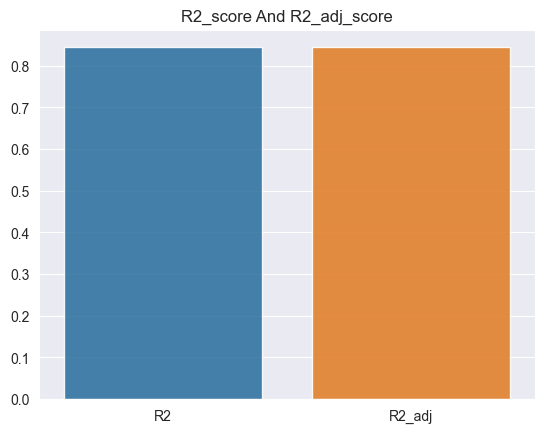

In [40]:
# compairing r2_score and r2_adjusted_score
sns.barplot(['R2','R2_adj'],
            [newModel.rsquared,newModel.rsquared_adj],
            alpha=0.9)
plt.title('R2_score And R2_adj_score')
plt.show()

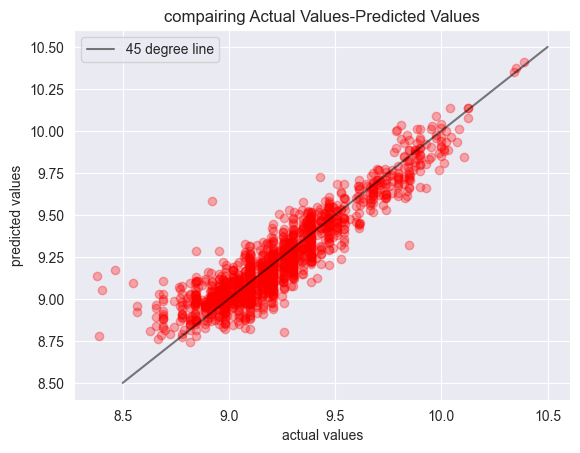

In [41]:
# compairing actual values- predicted values
plt.scatter(Y,newModel.fittedvalues,
            color='red',
            alpha=0.3)
plt.plot([8.5,10.5],[8.5,10.5],
         color='black',
         alpha=0.5,
         label='45 degree line')
plt.legend()
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('compairing Actual Values-Predicted Values')
plt.show()

In [42]:
h = pd.DataFrame(newModel.params)
h.rename(columns={0:'Coeff'},inplace=True)
h

,Coeff
Intercept,8.708102
Age,-0.010245
KM,-0.000968
HP,0.002905
Doors,0.010779
Gears,0.066008
Tax,0.000594
Weight,0.000578


In [43]:
# y = np.exp(eps + beta1*age + beta2*km**2 + beta3*hp + beta4*doors + beta5*gears + beta6*tax + beta7*weight)
y_hat = np.exp(8.708102+(-0.010245)*toyota.Age_08_04+(-0.000968)*((toyota.KM)**0.5)+(0.002905)*toyota.HP+(0.010779)*toyota.Doors+(0.066008)*toyota.Gears+(0.000594)*toyota.Quarterly_Tax+(0.000578)*toyota.Weight)

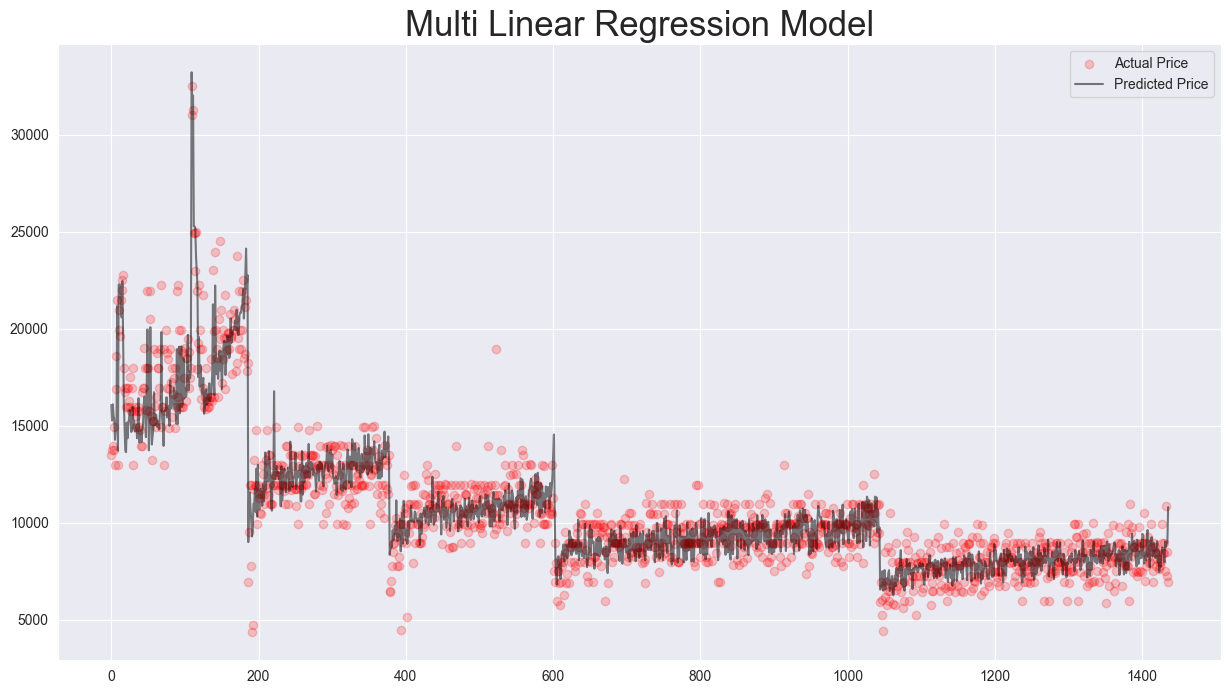

In [44]:

plt.figure(figsize=(15,8))
plt.scatter(toyota.Price.index,toyota.Price,
            color='red',alpha=0.2,label='Actual Price')
plt.plot(y_hat,color='black',alpha=0.5,label='Predicted Price')
plt.title('Multi Linear Regression Model',
           fontsize=25)
plt.legend()
plt.show()

# Training accuracy of our model is 84.30 %